In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import precision_recall_curve

with open('.env') as f:
    _data_pth_ = f.readline().strip()
    _data_pth_ = os.path.expanduser(_data_pth_)

### load data

In [17]:
data = pd.read_csv(f'{_data_pth_}/processed/train_transaction.csv', index_col=0)

### Regression

In [18]:
y, X = data['isFraud'], data.drop(columns=['isFraud'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
_lr = LR(penalty='l1', solver='saga') # use LASSO to filter features 
model = _lr.fit(X_train, y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


### Test

In [19]:
sc_train = model.score(X_train, y_train)
print(sc_train)
sc_test = model.score(X_test, y_test)
y_pred_test = model.predict(X_test)
probs_LR=model.predict_proba(X_test)
print(sc_test)

0.9720998531571219
0.9721673448652753


### dumb classifier test

In [20]:
y, X = data['isFraud'], data.drop(columns=['isFraud'])
y[5:10] = 1
model = _lr.fit(X[:10], y[:10])
sc_dumb = model.score(X_test, y_test)
print(sc_dumb)

0.30382955577563514


C:\Users\LIVELO~1\AppData\Local\Temp/ipykernel_23296/3010541318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[5:10] = 1
D:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


# Metrics
## Confusion matrix

In [30]:
# extract components of the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
print("Test data")
print([[tp,tn],[fp,fn]])
print("Misclassification error = ",fp+fn)   
print("SENS(recall)  = ",tp/(tp+fn)) 
print("SPEC   = ",tn/(tn+fp)) 
print("PPV(Precision)   = ",tp/(tp+fp)) 
print("NPV   = ",tn/(tn+fn)) 

Test data
[[1827, 187628], [384, 5040]]
Misclassification error =  5424
SENS(recall)  =  0.26605504587155965
SPEC   =  0.9979575771759249
PPV(Precision)   =  0.8263229308005428
NPV   =  0.9738410114808894


## Roc curve

<function matplotlib.pyplot.show(close=None, block=None)>

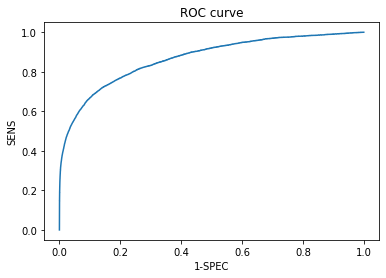

In [31]:
# Draw the ROC curve
plt.figure(1)
# ROC curve components
fpr, tpr, thresholdsROC = roc_curve(y_test, probs_LR[:,1])
#plot
plt.plot(fpr,tpr)
plt.title("ROC curve")
plt.xlabel("1-SPEC")
plt.ylabel("SENS")
plt.show

## PR curve

<function matplotlib.pyplot.show(close=None, block=None)>

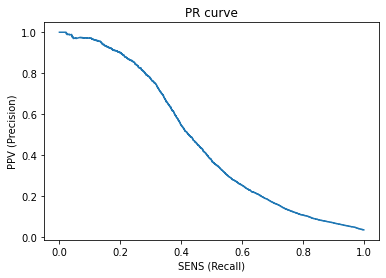

In [32]:
# Draw the PR curve
plt.figure(2)
# Components of the Precision recall curvey
precision, recall, thresholdsPR = precision_recall_curve(y_test, probs_LR[:,1])
# plot
plt.plot(recall,precision)
plt.title("PR curve")
plt.xlabel("SENS (Recall)")
plt.ylabel("PPV (Precision)")
plt.show